# Notes - Week 3

## Data Description (Availability and Shape)
### KIWO
- Kiwo.csv
- Columns (Date: YYYY-MM-DD), Kieler woche: 0 or 1)
### umsatzdate_gekuerzt
- Columns (id,Datum,Warengruppe,Umsatz)

### wetter.csv
- Columns (Datum,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode)


 

## Import Required Libraries

In [37]:
import pandas as pd
import numpy as np

# Load Data Files

## Datasets

In [38]:
#df_kieler_woche_data
df_kiwo = pd.read_csv('data/kiwo.csv')
print(f"Shape kiwo data: {df_kiwo.shape}")
print(f"\nColumns: {list(df_kiwo.columns)}")

#df_sales_data
df_sales = pd.read_csv('data/Umsatzdaten _gekuerzt.csv')
print(f"Shape sales data: {df_sales.shape}")
print(f"\nColumns: {list(df_sales.columns)}")

#weather_data
df_weather = pd.read_csv('data/wetter.csv')
print(f"Shape of weather data: {df_weather.shape}")
print(f"\nColumns: {list(df_weather.columns)}")

Shape kiwo data: (72, 2)

Columns: ['Datum', 'KielerWoche']
Shape sales data: (9334, 4)

Columns: ['id', 'Datum', 'Warengruppe', 'Umsatz']
Shape of weather data: (2601, 5)

Columns: ['Datum', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode']


In [39]:
df_sales.describe()

,id,Warengruppe,Umsatz
count,9.334000e+03,9334.000000,9334.000000
mean,1.559311e+06,3.088172,206.749044
std,1.512503e+05,1.489002,144.545189
min,1.307011e+06,1.000000,7.051201
25%,1.410123e+06,2.000000,96.897441
50%,1.601102e+06,3.000000,161.900831
75%,1.704223e+06,4.000000,280.644663
max,1.807315e+06,6.000000,1879.461831


## Visualizing completeness
### df_sales


Rows after dropping invalid dates: 9334
Rows before dropping invalid dates: 9334


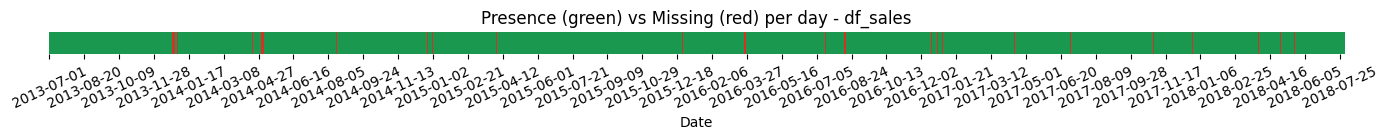

Sales record gaps (no rows):
Sales gap: 2013-12-25 -> 2013-12-26 (2 days)
Sales gap: 2013-12-28 -> 2013-12-28 (1 days)
Sales gap: 2014-01-01 -> 2014-01-01 (1 days)
Sales gap: 2014-04-18 -> 2014-04-18 (1 days)
Sales gap: 2014-05-01 -> 2014-05-01 (1 days)
Sales gap: 2014-05-03 -> 2014-05-04 (2 days)
Sales gap: 2014-08-17 -> 2014-08-17 (1 days)
Sales gap: 2014-12-25 -> 2014-12-26 (2 days)
Sales gap: 2015-01-01 -> 2015-01-01 (1 days)
Sales gap: 2015-04-03 -> 2015-04-03 (1 days)
Sales gap: 2015-05-01 -> 2015-05-01 (1 days)
Sales gap: 2015-12-25 -> 2015-12-26 (2 days)
Sales gap: 2016-01-01 -> 2016-01-01 (1 days)
Sales gap: 2016-03-24 -> 2016-03-25 (2 days)
Sales gap: 2016-07-07 -> 2016-07-07 (1 days)
Sales gap: 2016-07-18 -> 2016-07-18 (1 days)
Sales gap: 2016-08-14 -> 2016-08-15 (2 days)
Sales gap: 2016-12-17 -> 2016-12-17 (1 days)
Sales gap: 2016-12-25 -> 2016-12-26 (2 days)
Sales gap: 2017-01-01 -> 2017-01-01 (1 days)
Sales gap: 2017-04-14 -> 2017-04-14 (1 days)
Sales gap: 2017-05-01 -> 2

In [40]:
# Visualizing completeness first for sales data
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Convert date column to datetime and create date-only column
df_sales['Datum'] = pd.to_datetime(df_sales['Datum'], errors='coerce')
print(f"Rows after dropping invalid dates: {df_sales.shape[0]}")

# check if any rows have Umsatz as Nan or 0; if so, print a warning
if df_sales['Umsatz'].isnull().any():
    print("Warning: Some rows have missing Umsatz values.")
if (df_sales['Umsatz'] == 0).any():
    print("Warning: Some rows have Umsatz value of 0.")
    print(df_sales[df_sales['Umsatz'] == 0])

df_sales = df_sales.dropna(subset=['Datum'])  # drop rows that failed to parse
#check if any rows were dropped
if df_sales['Datum'].isnull().any():
    print("Warning: Some rows were dropped due to invalid dates.")
#print count before dropping and after dropping
    
print(f"Rows before dropping invalid dates: {df_sales.shape[0]}")

df_sales['date'] = df_sales['Datum'].dt.date  # python date objects (no time)

# Group by date (no DatetimeIndex) to get daily counts and totals
daily = (
    df_sales.groupby('date')
    .agg(n_records=('Umsatz', 'size'), total_sales=('Umsatz', 'sum'))
    .sort_index()
)

# Full daily index as python dates and reindex to ensure contiguous date coverage
idx = pd.date_range(daily.index.min(), daily.index.max(), freq='D').date
daily = daily.reindex(pd.Index(idx, name='date'))

# Fill n_records and total_sales for days with no records (will show as missing)
daily['n_records'] = daily['n_records'].fillna(0).astype(int)
daily['total_sales'] = daily['total_sales'].fillna(0.0)

# Identify missing days and zero-sales days
missing_days = daily['n_records'] == 0
zero_sales_days = (daily['total_sales'] == 0) & (daily['n_records'] > 0)



# Plot 3: presence heatmap (binary) — overview missing vs present
presence = daily['n_records'] > 0
presence_df = presence.astype(int).to_frame().T  # 1 row for heatmap (compact)
plt.figure(figsize=(14, 1.5))
sns.heatmap(presence_df, cmap=['#d73027', '#1a9850'], cbar=False, linewidths=0, xticklabels=50)
plt.title('Presence (green) vs Missing (red) per day - df_sales')
plt.xlabel('Date')
plt.yticks([])
plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

# Helper to print gaps in a concise format (date objects)
def print_gaps(series_bool, name):
    is_missing = ~series_bool  # True means missing
    groups = (is_missing != is_missing.shift()).cumsum()
    for _, g in is_missing.groupby(groups):
        if g.iloc[0]:
            start, end = g.index.min(), g.index.max()
            length = len(g)
            print(f"{name} gap: {start} -> {end} ({length} days)")

print("Sales record gaps (no rows):")
print_gaps(presence, 'Sales')
# print gap counts
print(f"Total gaps: {(~presence).sum()}")


print("\nDays with total sales == 0 but rows exist:")
zero_ranges = zero_sales_days[zero_sales_days].index
for d in zero_ranges[:20]:  # sample first 20
    print(d)

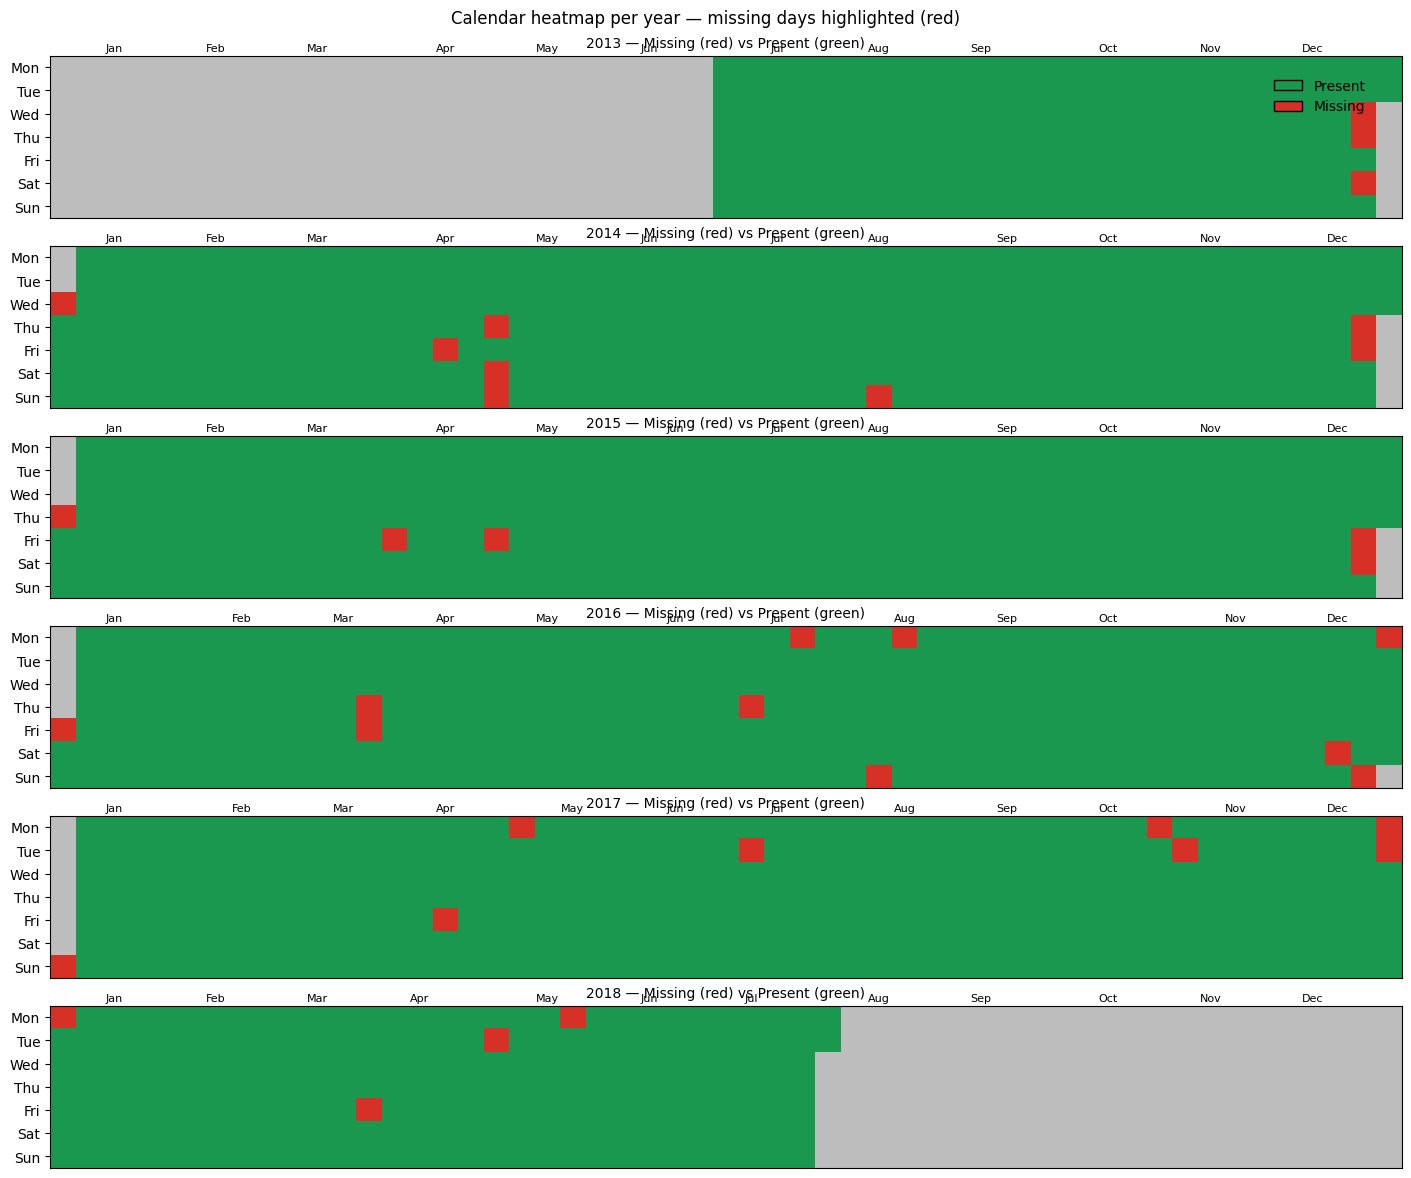

In [41]:
#Day of week missing sales records

# ...existing code...
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import calendar
import numpy as np

# Ensure Datum parsed and we only use df_sales
df_sales['Datum'] = pd.to_datetime(df_sales['Datum'], errors='coerce')
df_sales = df_sales.dropna(subset=['Datum']).copy()
df_sales.index = df_sales['Datum'].dt.normalize()  # DatetimeIndex normalized to midnight

# Daily aggregation (rows per day)
daily = df_sales.resample('D').agg(n_records=('Umsatz', 'size'), total_sales=('Umsatz', 'sum'))
daily.index = pd.to_datetime(daily.index).normalize()

# If empty, bail out
if daily.empty:
    print("No valid df_sales rows after parsing 'Datum'. Nothing to plot.")
else:
    # Overall date range (full coverage)
    overall_start = daily.index.min()
    overall_end = daily.index.max()

    # Presence boolean
    present_ser = (daily['n_records'] > 0)

    # Years to plot
    years = list(range(overall_start.year, overall_end.year + 1))

    # Calendar heatmaps per year (missing days highlighted red)
    fig, axes = plt.subplots(len(years), 1, figsize=(14, 1.9 * max(1, len(years))), constrained_layout=True)
    if len(years) == 1:
        axes = [axes]

    for ax, year in zip(axes, years):
        year_start = pd.Timestamp(year=year, month=1, day=1)
        year_end = pd.Timestamp(year=year, month=12, day=31)
        dates = pd.date_range(year_start, year_end, freq='D')

        # weekday 0=Mon .. 6=Sun
        weekday = dates.weekday
        week_index = ((dates.dayofyear + year_start.weekday()) - 1) // 7
        weeks = int(week_index.max() + 1)

        # 2 => outside overall range (N/A), 1 => missing, 0 => present
        mat = np.full((7, weeks), 2, dtype=int)

        # Fill from presence, only for dates within overall range
        in_range_mask = (dates >= overall_start) & (dates <= overall_end)
        pres_for_dates = present_ser.reindex(dates, fill_value=False).astype(int)

        for d, w, wd, in_range, pres in zip(dates, week_index, weekday, in_range_mask, pres_for_dates):
            if not in_range:
                mat[int(wd), int(w)] = 2
            else:
                mat[int(wd), int(w)] = 0 if pres else 1

        cmap = ListedColormap(['#1a9850', '#d73027', '#bdbdbd'])  # present green, missing red, n/a grey
        ax.imshow(mat, aspect='auto', interpolation='none', cmap=cmap, vmin=0, vmax=2)
        ax.set_title(f"{year} — Missing (red) vs Present (green)", fontsize=10, pad=6)
        ax.set_yticks(range(7))
        ax.set_yticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
        ax.set_xticks([])

        # Month centers for labels
        month_centers = {}
        for month in range(1, 13):
            month_dates = dates[dates.month == month]
            if len(month_dates) == 0:
                continue
            month_start = month_dates[0]
            month_end = month_dates[-1]
            wc = int(((month_start.dayofyear + year_start.weekday()) - 1) // 7)
            week_last = int(((month_end.dayofyear + year_start.weekday()) - 1) // 7)
            center = (wc + week_last) // 2
            month_centers[month] = center

        for month, center in month_centers.items():
            ax.text(center, -0.6, calendar.month_abbr[month], ha='center', va='bottom', fontsize=8)

    legend_elements = [
        Patch(facecolor='#1a9850', edgecolor='k', label='Present'),
        Patch(facecolor='#d73027', edgecolor='k', label='Missing')
    ]
    # Keep N/A legend optional
    fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(0.98, 0.97), frameon=False)
    plt.suptitle('Calendar heatmap per year — missing days highlighted (red)', fontsize=12, y=1.02)
    plt.show()
# ...existing code...

## df_weather

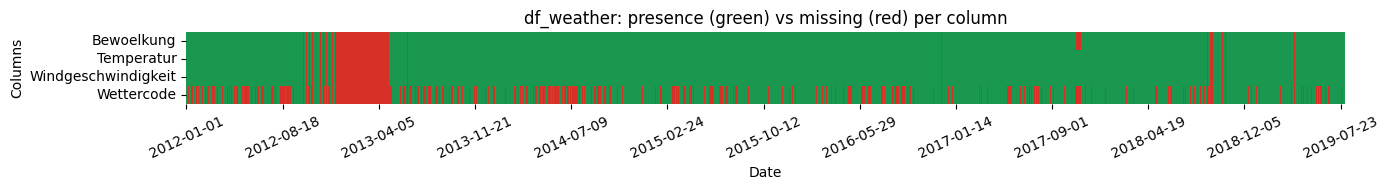

Per-column missing rate (descending):
Wettercode             0.302527
Bewoelkung             0.064621
Temperatur             0.061011
Windgeschwindigkeit    0.061011
dtype: float64


In [43]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np

# Robustly detect the date column in df_weather
date_col = None
candidates = ['Datum', 'Date', 'date', 'datum', 'DATUM', 'DATE']
for c in candidates:
    if c in df_weather.columns:
        date_col = c
        break
if date_col is None:
    # fallback: first column containing 'date' or 'datum'
    date_col = next((c for c in df_weather.columns if 'date' in c.lower() or 'datum' in c.lower()), None)

if date_col is None:
    raise KeyError(f"No date column found in df_weather. Available columns: {list(df_weather.columns)}")

# Parse and index by normalized daily datetime
df_weather[date_col] = pd.to_datetime(df_weather[date_col], errors='coerce')
df_weather = df_weather.dropna(subset=[date_col]).copy()
df_weather.index = df_weather[date_col].dt.normalize()

# Reindex to continuous daily coverage (so missing days appear as NaN rows)
if df_weather.index.empty:
    print("df_weather has no valid dates after parsing.")
else:
    idx = pd.date_range(df_weather.index.min(), df_weather.index.max(), freq='D')
    df_weather = df_weather.reindex(idx)
    df_weather.index.name = 'date'

    # Exclude the parsed date column from the columns to visualize (may be duplicates)
    cols = [c for c in df_weather.columns if c != date_col]

    if len(cols) == 0:
        print("No non-date columns found in df_weather to visualize.")
    else:
        # Build presence DataFrame: rows=weather columns, columns=dates, values 1=present, 0=missing
        presence_df = df_weather[cols].notnull().astype(int).T

        # Plot heatmap (binary) of missing vs present per column
        # scale height by number of rows (columns) to keep plot readable
        height = max(2, 0.2 * len(presence_df.index))
        plt.figure(figsize=(14, height))
        cmap = ListedColormap(['#d73027', '#1a9850'])  # 0 => red (missing), 1 => green (present)
        ax = sns.heatmap(presence_df, cmap=cmap, cbar=False, xticklabels=50)
        plt.title('df_weather: presence (green) vs missing (red) per column')
        plt.xlabel('Date')
        plt.ylabel('Columns')

        # Reduce xtick density to avoid clutter
        ncols = presence_df.shape[1]
        if ncols > 0:
            step = max(1, ncols // 12)
            xticks = np.arange(0, ncols, step)
            ax.set_xticks(xticks + 0.5)  # heatmap pixels center
            ax.set_xticklabels([presence_df.columns[i].strftime('%Y-%m-%d') for i in xticks], rotation=25)

        plt.tight_layout()
        plt.show()

        # Per-column missing rate summary
        missing_rate = df_weather[cols].isnull().mean().sort_values(ascending=False)
        print("Per-column missing rate (descending):")
        print(missing_rate)
# ...existing code...

## Merge df_sales and df_weather

['id', 'Datum', 'Warengruppe', 'Umsatz', 'date']
Merged dataframe columns: ['n_records', 'total_sales', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 'kieler_woche']


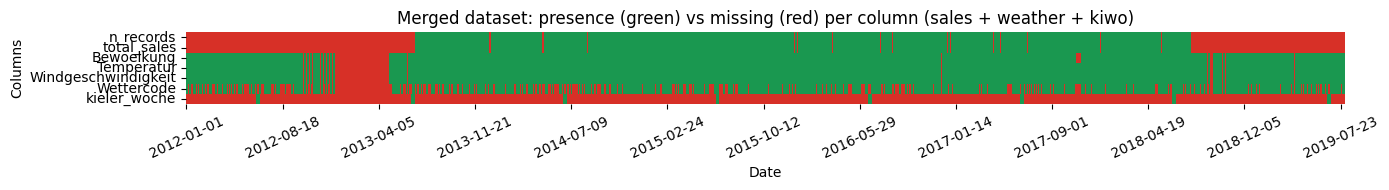

Per-column missing rate in merged dataframe (descending):
kieler_woche           0.974007
total_sales            0.343321
n_records              0.343321
Wettercode             0.302527
Bewoelkung             0.064621
Windgeschwindigkeit    0.061011
Temperatur             0.061011
dtype: float64


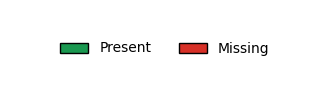

In [56]:
# ...existing code...
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

# Helper to robustly detect a date column
def detect_date_col(df):
    candidates = ['Datum', 'Date', 'date', 'datum', 'DATUM', 'DATE']
    for c in candidates:
        if c in df.columns:
            return c
    return next((c for c in df.columns if 'date' in c.lower() or 'datum' in c.lower()), None)

# Detect date columns
sales_date_col = detect_date_col(df_sales)
weather_date_col = detect_date_col(df_weather)
kiwo_date_col = detect_date_col(df_kiwo)

if sales_date_col is None:
    raise KeyError(f"No date-like column found in df_sales. Columns: {list(df_sales.columns)}")
if weather_date_col is None:
    raise KeyError(f"No date-like column found in df_weather. Columns: {list(df_weather.columns)}")
if kiwo_date_col is None:
    raise KeyError(f"No date-like column found in df_kiwo. Columns: {list(df_kiwo.columns)}")

# Parse and normalize indices
df_sales[sales_date_col] = pd.to_datetime(df_sales[sales_date_col], errors='coerce')
df_sales = df_sales.dropna(subset=[sales_date_col]).copy()
df_sales.index = df_sales[sales_date_col].dt.normalize()

print(df_sales.columns.tolist())

df_weather[weather_date_col] = pd.to_datetime(df_weather[weather_date_col], errors='coerce')
df_weather = df_weather.dropna(subset=[weather_date_col]).copy()
df_weather.index = df_weather[weather_date_col].dt.normalize()

df_kiwo[kiwo_date_col] = pd.to_datetime(df_kiwo[kiwo_date_col], errors='coerce')
df_kiwo = df_kiwo.dropna(subset=[kiwo_date_col]).copy()
df_kiwo.index = df_kiwo[kiwo_date_col].dt.normalize()

# Aggregate sales to daily (n_records, total_sales) for presence
df_sales_daily = (
    df_sales
    .resample('D')
    .agg(n_records=('Umsatz', 'size'), total_sales=('Umsatz', 'sum'))
)
df_sales_daily.index = pd.to_datetime(df_sales_daily.index).normalize()

# Normalize the column name for kiwo (rename the first non-date column to 'kieler_woche' if needed)
kiwo_non_date_cols = [c for c in df_kiwo.columns if c != kiwo_date_col]
if len(kiwo_non_date_cols) == 0:
    raise KeyError("df_kiwo contains only a date column; expected 'Kieler woche' column.")
kiwo_col = kiwo_non_date_cols[0]
df_kiwo = df_kiwo.rename(columns={kiwo_col: 'kieler_woche'})

# Build a continuous daily index covering all three datasets
overall_min = min(
    df_sales_daily.index.min() if not df_sales_daily.empty else pd.Timestamp('2100-01-01'),
    df_weather.index.min() if not df_weather.empty else pd.Timestamp('2100-01-01'),
    df_kiwo.index.min() if not df_kiwo.empty else pd.Timestamp('2100-01-01'),
)
overall_max = max(
    df_sales_daily.index.max() if not df_sales_daily.empty else pd.Timestamp('1900-01-01'),
    df_weather.index.max() if not df_weather.empty else pd.Timestamp('1900-01-01'),
    df_kiwo.index.max() if not df_kiwo.empty else pd.Timestamp('1900-01-01'),
)
full_idx = pd.date_range(overall_min, overall_max, freq='D')

# Reindex all to full index so gaps are explicit
df_sales_daily = df_sales_daily.reindex(full_idx)
df_sales_daily.index.name = 'date'
df_weather = df_weather.reindex(full_idx)
df_weather.index.name = 'date'
df_kiwo = df_kiwo.reindex(full_idx)
df_kiwo.index.name = 'date'

# Drop original date columns (if present) and keep data columns
df_weather_data = df_weather.drop(columns=[weather_date_col], errors='ignore')
df_kiwo_data = df_kiwo.drop(columns=[kiwo_date_col], errors='ignore')

# Merge all (sales daily, weather data, kiwo)
df_merged = pd.concat([df_sales_daily, df_weather_data, df_kiwo_data], axis=1)
#print columns of merged dataframe
print(f"Merged dataframe columns: {list(df_merged.columns)}")

# Build presence boolean DataFrame
presence_bool = pd.DataFrame(index=df_merged.index)

# Sales presence: treat day as present if n_records > 0
if 'n_records' in df_merged.columns:
    presence_bool['n_records'] = df_merged['n_records'].fillna(0) > 0
if 'total_sales' in df_merged.columns:
    # Align total_sales presence with n_records for readability; this column will show the same trend
    presence_bool['total_sales'] = df_merged['n_records'].fillna(0) > 0

# For all other columns, presence is notnull
for c in df_merged.columns:
    if c in ('n_records', 'total_sales'):
        continue
    presence_bool[c] = df_merged[c].notnull()

# Convert to int and transpose rows=columns, cols=dates for heatmap
presence_df = presence_bool.astype(int).T

# Plot binary presence heatmap (green present, red missing)
plt.figure(figsize=(14, max(2, 0.22 * len(presence_df.index))))
cmap = ListedColormap(['#d73027', '#1a9850'])  # 0 red (missing), 1 green (present)
ax = sns.heatmap(presence_df, cmap=cmap, cbar=False, xticklabels=50, linewidths=0)

# Labels and axis tuning
plt.title('Merged dataset: presence (green) vs missing (red) per column (sales + weather + kiwo)')
plt.xlabel('Date')
plt.ylabel('Columns')

# Reduce xtick density to avoid clutter
ncols = presence_df.shape[1]
if ncols > 0:
    step = max(1, ncols // 12)
    xticks = np.arange(0, ncols, step)
    ax.set_xticks(xticks + 0.5)  # center ticks in heatmap pixels
    ax.set_xticklabels([pd.to_datetime(presence_df.columns[i]).strftime('%Y-%m-%d') for i in xticks], rotation=25)

plt.tight_layout()
plt.show()

# Print per-column missing rate
missing_rate = (~presence_bool).mean().sort_values(ascending=False)
print("Per-column missing rate in merged dataframe (descending):")
print(missing_rate)

# Optional: small legend for clarity
legend_handles = [
    Patch(facecolor='#1a9850', edgecolor='k', label='Present'),
    Patch(facecolor='#d73027', edgecolor='k', label='Missing'),
]
plt.figure(figsize=(4, 1))
plt.legend(handles=legend_handles, loc='center', ncol=2, frameon=False)
plt.axis('off')
plt.show()
# ...existing code...

### Testing merged dataframe

In [68]:
# ...existing code...
# Simple merge of df_sales, df_weather, df_kiwo on 'Datum' (no auto-detection, no plotting)

# Validate presence of 'Datum'
for name, df in (('df_sales', df_sales), ('df_weather', df_weather), ('df_kiwo', df_kiwo)):
    if 'Datum' not in df.columns:
        raise KeyError(f"'Datum' column missing from {name}. Columns: {list(df.columns)}")

# Work on copies and drop any index named 'Datum' to avoid ambiguity
sales = df_sales.reset_index(drop=True).copy()
weather = df_weather.reset_index(drop=True).copy()
kiwo = df_kiwo.reset_index(drop=True).copy()

# Ensure Datum is datetime and normalized (strip time)
for df in (sales, weather, kiwo):
    df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce').dt.normalize()
    df.dropna(subset=['Datum'], inplace=True)
    if 'date' in df.columns:
        df.drop(columns=['date'], inplace=True)

# Merge all three on 'Datum' (outer join keeps all dates)
merged_df = (
    sales.merge(weather, on='Datum', how='outer', suffixes=('', '_weather'))
         .merge(kiwo, on='Datum', how='outer', suffixes=('', '_kiwo'))
)

# Print column list
print("merged_df shape:", merged_df.shape)
print("merged_df columns:")
print(list(merged_df.columns))
# ...existing code...
# print random rows
print(merged_df.sample(10, random_state=42))

merged_df shape: (10119, 9)
merged_df columns:
['id', 'Datum', 'Warengruppe', 'Umsatz', 'Bewoelkung', 'Temperatur', 'Windgeschwindigkeit', 'Wettercode', 'kieler_woche']
              id      Datum  Warengruppe      Umsatz  Bewoelkung  Temperatur  \
10096        NaN 2019-07-10          NaN         NaN         1.0     19.2125   
7846   1707175.0 2017-07-17          5.0  308.725687         6.0     18.5000   
7762   1706302.0 2017-06-30          2.0  332.500323         7.0     14.8750   
510    1307244.0 2013-07-24          4.0   83.581633         3.0     24.0750   
5026   1512303.0 2015-12-30          3.0  198.531538         8.0      5.2500   
3325   1501293.0 2015-01-29          3.0  130.868670         7.0      1.5000   
2119   1406083.0 2014-06-08          3.0  280.533351         6.0     22.1000   
7089   1702141.0 2017-02-14          1.0  141.073519         2.0     -0.7500   
7182   1703044.0 2017-03-04          4.0  106.359853         6.0      9.1250   
4905   1512084.0 2015-12-08    

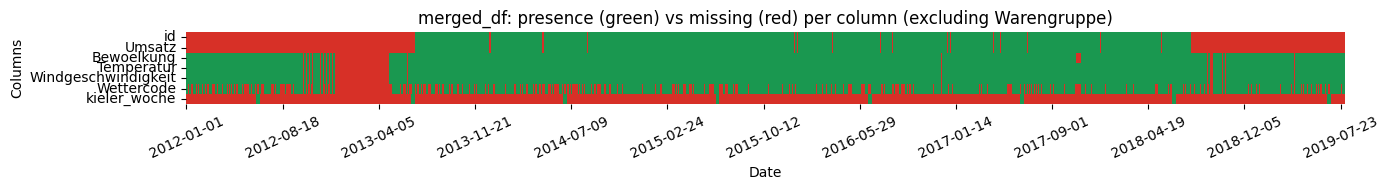

Per-column missing rate in merged_df (descending), excluding Warengruppe:
kieler_woche           0.974007
Umsatz                 0.343321
id                     0.343321
Wettercode             0.302527
Bewoelkung             0.064621
Windgeschwindigkeit    0.061011
Temperatur             0.061011
dtype: float64


In [73]:
# ...existing code...
# Binary presence heatmap for merged_df (skip columns containing 'Warengruppe')

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch
import numpy as np

# Ensure merged_df exists
if 'merged_df' not in globals():
    raise NameError("merged_df not defined. Run the merge cell first.")

# Make a copy to avoid mutating original
df = merged_df.copy()

# If there's a 'Datum' column, set it as index; otherwise ensure index is datetime
if 'Datum' in df.columns:
    df['Datum'] = pd.to_datetime(df['Datum'], errors='coerce').dt.normalize()
    df = df.dropna(subset=['Datum']).set_index('Datum')
elif isinstance(df.index, pd.DatetimeIndex):
    df.index = pd.to_datetime(df.index).normalize()
else:
    # Try to detect a date-like column
    candidates = ['Datum', 'Date', 'date', 'datum']
    date_col = next((c for c in df.columns if c in candidates), None)
    if date_col is not None:
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce').dt.normalize()
        df = df.dropna(subset=[date_col]).set_index(date_col)
    else:
        raise KeyError("No 'Datum' column or DatetimeIndex found in merged_df")

# Aggregate per day: a column is present if any row on that day has a non-null value
presence_agg = df.groupby(df.index).agg(lambda s: s.notnull().any())

# Reindex to a full daily range (unique index ensured by groupby)
full_idx = pd.date_range(presence_agg.index.min(), presence_agg.index.max(), freq='D')
presence_agg = presence_agg.reindex(full_idx, fill_value=False)

# Exclude columns containing 'Warengruppe' (case-insensitive)
exclude_mask = [("warengruppe" in c.lower()) for c in presence_agg.columns]
cols_to_check = [c for c, mask in zip(presence_agg.columns, exclude_mask) if not mask]

# Build final presence boolean DataFrame
presence_bool = presence_agg[cols_to_check].astype(bool)

# Special handling: if 'n_records' exists, treat presence = n_records > 0
if 'n_records' in presence_agg.columns and 'n_records' in cols_to_check:
    # presence_agg['n_records'] is boolean already (from notnull()); try to fall back to original df if needed
    # If original df had 'n_records' as counts, prefer >0 detection
    if 'n_records' in df.columns:
        # aggregate counts per day
        counts = df['n_records'].groupby(df.index).sum().reindex(full_idx, fill_value=0)
        presence_bool['n_records'] = counts > 0

# Transpose for plotting: rows=columns, cols=dates
presence_df = presence_bool.astype(int).T

# Plot binary presence heatmap (green present, red missing)
plt.figure(figsize=(14, max(2, 0.22 * len(presence_df.index))))
cmap = ListedColormap(['#d73027', '#1a9850'])  # 0 red (missing), 1 green (present)
ax = sns.heatmap(presence_df, cmap=cmap, cbar=False, xticklabels=50, linewidths=0)

plt.title('merged_df: presence (green) vs missing (red) per column (excluding Warengruppe)')
plt.xlabel('Date')
plt.ylabel('Columns')

# Reduce xtick density
ncols = presence_df.shape[1]
if ncols > 0:
    step = max(1, ncols // 12)
    xticks = np.arange(0, ncols, step)
    ax.set_xticks(xticks + 0.5)
    ax.set_xticklabels([pd.to_datetime(presence_df.columns[i]).strftime('%Y-%m-%d') for i in xticks], rotation=25)

plt.tight_layout()
plt.show()

# Print per-column missing rate (descending)
missing_rate = (~presence_bool).mean().sort_values(ascending=False)
print("Per-column missing rate in merged_df (descending), excluding Warengruppe:")
print(missing_rate)
